# Random Forest Regressor - Predicting Future Stock Price

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [2]:
# Read in stock historical prices and calculate daily return
stock_prices = pd.read_csv("../Resources/stock_historical_prices.csv") 
stock_prices = stock_prices.set_index("Date")
stock_prices["Return"] = stock_prices["Adj Close"].pct_change() * 100
stock_prices.dropna(inplace=True)
stock_prices.head()

,Adj Close,Return
Date,,
2015-03-19,185.758835,-0.456112
2015-03-20,187.398468,0.882668
2015-03-23,187.033279,-0.194873
2015-03-24,185.982346,-0.561897
2015-03-25,183.257004,-1.465377


In [3]:
# Create a lagged return using the shift function
stock_prices["Lagged_Return"] = stock_prices["Return"].shift(1)

stock_prices.tail()

,Adj Close,Return,Lagged_Return
Date,,,
2021-03-15,395.115906,0.596360,0.134676
2021-03-16,394.617523,-0.126136,0.596360
2021-03-17,395.963135,0.340991,-0.126136
2021-03-18,390.201996,-1.454969,0.340991
2021-03-19,389.480011,-0.185028,-1.454969


In [4]:
# Create a train/test split for the data using 2021 for testing and the rest for training
train = stock_prices[:'2021'].dropna()
test = stock_prices['2021':]

In [5]:
train.tail()

,Adj Close,Return,Lagged_Return
Date,,,
2020-12-24,367.795380,0.389039,0.089867
2020-12-28,370.955048,0.859083,0.389039
2020-12-29,370.247345,-0.190779,0.859083
2020-12-30,370.775604,0.142677,-0.190779
2020-12-31,372.659454,0.508084,0.142677


In [6]:
test.tail()

,Adj Close,Return,Lagged_Return
Date,,,
2021-03-15,395.115906,0.596360,0.134676
2021-03-16,394.617523,-0.126136,0.596360
2021-03-17,395.963135,0.340991,-0.126136
2021-03-18,390.201996,-1.454969,0.340991
2021-03-19,389.480011,-0.185028,-1.454969


In [7]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Return"), Y_test (test set of just the "y" variable):
X_train = pd.DataFrame(train["Lagged_Return"])
X_test = pd.DataFrame(test["Lagged_Return"])
y_train = pd.DataFrame(train["Return"])
y_test = pd.DataFrame(test["Return"])

In [8]:
# Create a Random Forest Regression model and fit it to the training data
from sklearn.ensemble import RandomForestRegressor

# Fit a SKLearn Random Forest regressor using just the training set (X_train, Y_train)
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)

In [9]:
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,0.161546
1,0.201106
2,-0.109758
3,1.098476
4,0.199201


In [10]:
y_test.head()

,Return
Date,
2021-01-04,-1.361394
2021-01-05,0.688730
2021-01-06,0.597847
2021-01-07,1.485756
2021-01-08,0.569772


In [11]:
# Make a prediction of "y" values using just the test dataset
predictions = model.predict(X_test)

In [12]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = pd.DataFrame(y_test)
Results["Predicted Return"] = predictions
Results[:20]

,Return,Predicted Return
Date,,
2021-01-04,-1.361394,0.161546
2021-01-05,0.688730,0.201106
2021-01-06,0.597847,-0.109758
2021-01-07,1.485756,1.098476
2021-01-08,0.569772,0.199201
2021-01-11,-0.674082,-0.690540
2021-01-12,0.021118,-0.196027
2021-01-13,0.269299,-1.159256
2021-01-14,-0.350200,-0.163594


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

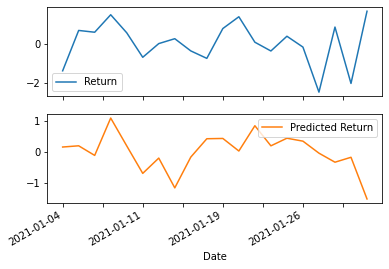

In [13]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True)

In [14]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"])
print(f"Mean Squared Error = {mse}")

Mean Squared Error = 1.4039264892506067


In [15]:
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 1.1848740394027573


In [16]:
# Construct a dataframe using just the "y" training data:
in_sample_results = pd.DataFrame(y_train)

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(in_sample_results["Return"],in_sample_results["In-sample Predictions"])

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.5018343252495904


In [17]:
# Based on this dataset and model setup, the model is not able to predict future prices (out-of-sample error is much higher than in-sample error). We need to tweak the timeframe as well as model hyperparameters to see if we can improve the model performance.

# We will evaluate classification performace to see how well this model can predict the trend.